In [2]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
from plotnine import *
from plotnine.data import *

In [3]:
gapminder = pd.read_csv('https://raw.githubusercontent.com/resbaz/r-novice-gapminder-files/master/data/gapminder-FiveYearData.csv',header = 0)
gapminder.head()
gapminder2 = gapminder[gapminder.country != "Kuwait"]
gapminder2.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


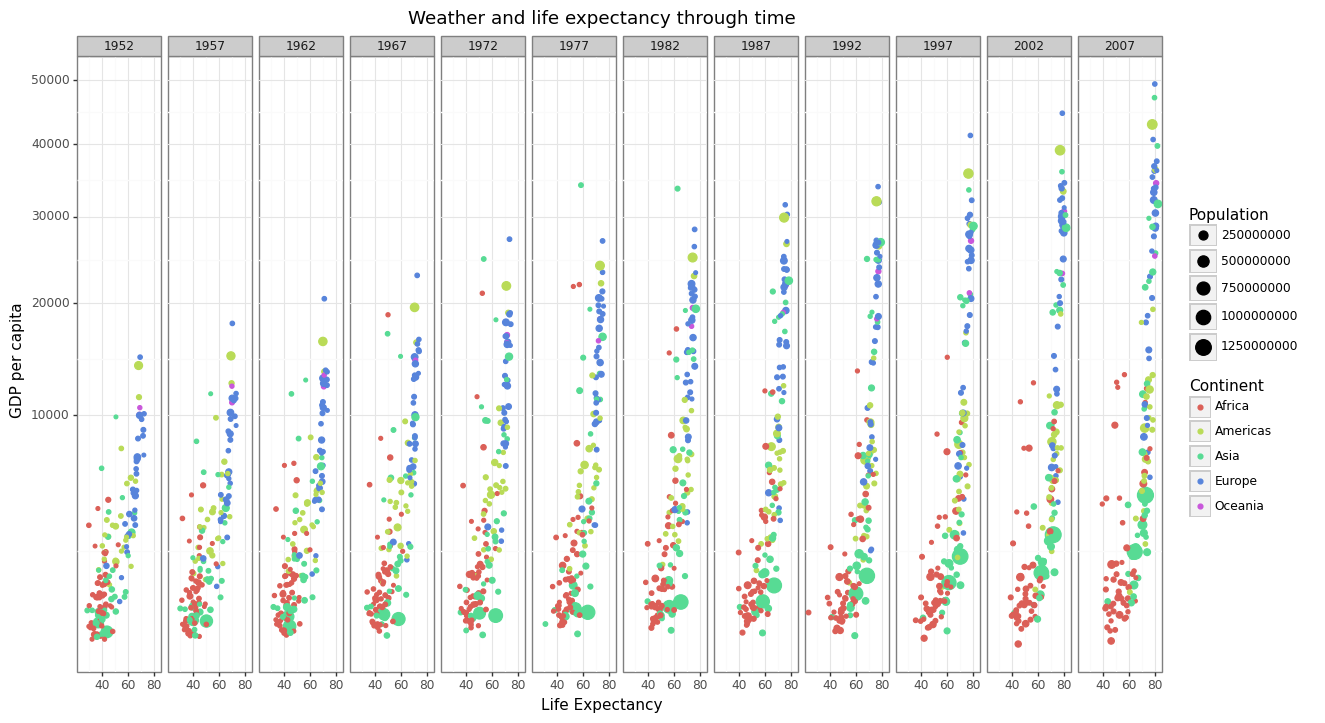

<ggplot: (186119985655)>

In [4]:
ggplot(gapminder2, aes(x="lifeExp", y="gdpPercap", size = "pop", color = "continent")) + geom_point() + facet_wrap("year", nrow = 1) + scale_y_sqrt() + theme_bw() + labs(x = "Life Expectancy", y = "GDP per capita", size = "Population", color = "Continent", title = "Weather and life expectancy through time") + theme (figure_size = (14,8))

In [106]:
# https://stackoverflow.com/questions/31521027/groupby-weighted-average-and-sum-in-pandas-dataframe
# https://www.gairuo.com/p/pandas-agg

# Define a lambda function to compute the weighted mean:
wm = lambda x: np.average(x, weights=gapminder2.loc[x.index, "pop"])
# Groupby and aggregate with namedAgg [1]:
gapminder3 = gapminder2.groupby(['continent', 'year']).agg(pop_1M=("pop", "sum"),gdpPercapweighted=("gdpPercap", wm)).reset_index() # 得到的结果自动将年和洲设为索引，需要重置以调用。
gapminder3["pop_1M"] = gapminder3["pop_1M"]/1000000
gapminder3.head()

,continent,year,pop_1M,gdpPercapweighted
0,Africa,1952,237.640501,1311.221439
1,Africa,1957,264.837738,1444.951993
2,Africa,1962,296.516865,1540.599054
3,Africa,1967,335.289489,1774.847446
4,Africa,1972,379.879541,2063.171343


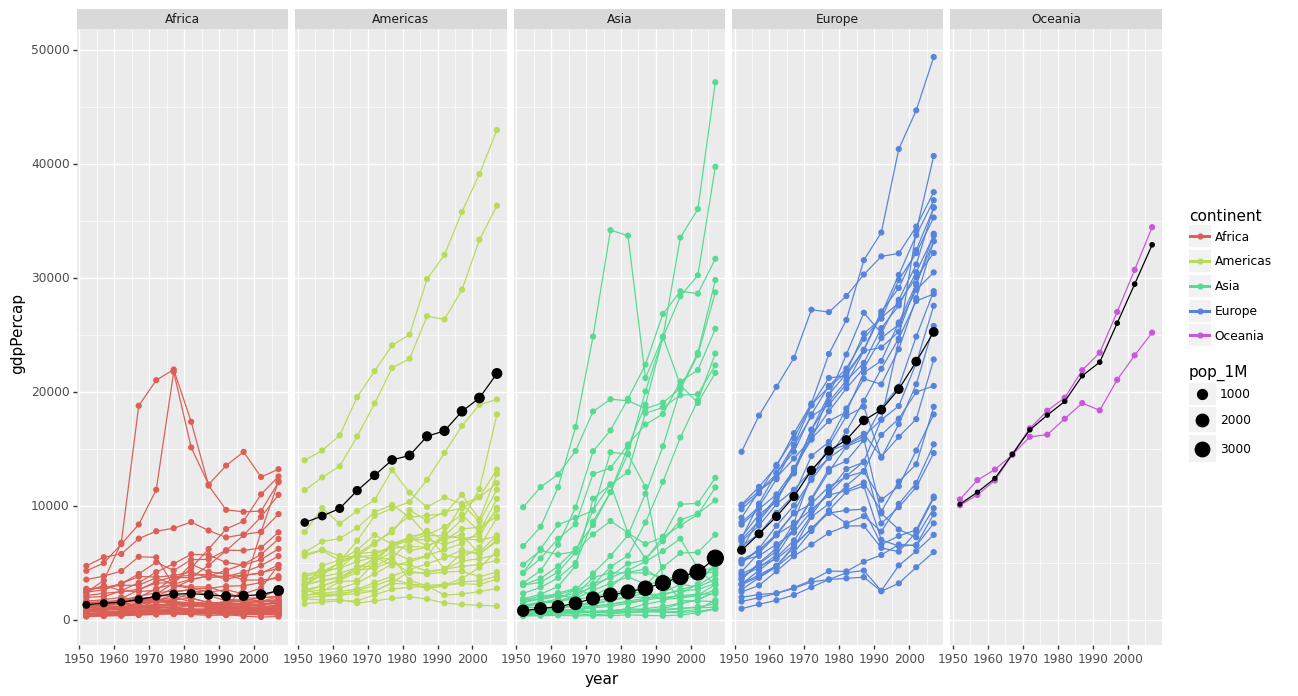

<ggplot: (186134086129)>

In [108]:
(ggplot(gapminder2) 
 + geom_line(aes(x = "year", y = "gdpPercap", color = "continent", group = "country")) 
 + geom_point(aes(x = "year", y = "gdpPercap", color = "continent", group = "country")) 
 + geom_point(gapminder3, aes(x = "year", y = "gdpPercapweighted", size = "pop_1M")) 
 + geom_line(gapminder3, aes(x = "year", y = "gdpPercapweighted")) 
 + facet_wrap("~continent", nrow = 1)) + theme (figure_size = (14,8)) 